In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [8]:
# directory to save data and figures
data_dir = '../../data/NGJ/'
save_dir = '../../data/synthetic_bulk/'
reference_dataname = 'js'
reference_assignment_name = 'SEACell_assignments'
SWITCH = True

# Load Cluster Data

In [9]:
if SWITCH:
	reference_path = data_dir + reference_dataname + "_switch.csv"
	reference_assignment_path = data_dir + reference_assignment_name + "_switch.csv"
else:
	reference_path = data_dir + reference_dataname + "_gene.csv"
	reference_assignment_path = data_dir + reference_assignment_name  + "_gene.csv"

ref_df = pd.read_csv(reference_path, index_col=0, delimiter="\t").T
ref_assign_df = pd.read_csv(reference_assignment_path, delimiter="\t", index_col=0)


# convert to natural log
ref_df = np.log(2 ** (ref_df))

clusters_mean = ref_df.groupby(ref_assign_df['SEACell']).mean()
clusters_std = ref_df.groupby(ref_assign_df['SEACell']).std()


FileNotFoundError: [Errno 2] No such file or directory: '../../data/NGJ/js_switch.csv'

In [31]:
if representation == '':
	cluster_std = pd.read_csv(data_dir + 'cluster_std_jane.csv', index_col=0)
elif representation == 'switches':
	cluster_std = pd.read_csv(data_dir + 'cluster_js_std_switch.csv', index_col=0)
cluster_std.head()

,SAMD11,ISG15,AGRN,RNF223,TNFRSF18,TNFRSF4,DVL1,MXRA8,KLHL21,TNFRSF9,...,CETN2,ZNF185,BCAP31,ATP6AP1,FAM50A,MPP1,CLIC2,TTTY14,MT-ND3,AC004556.3
SEACell,,,,,,,,,,,,,,,,,,,,,
SEACell-0,1.401644,3.381936,1.127564,1.039800,3.984344,5.160495,1.904239,1.347484,1.876900,2.403573,...,1.906209,1.039800,2.357012,2.510996,3.321529,1.451027,1.039800,1.056209,1.731138,3.123201
SEACell-1,1.774036,2.285271,1.845151,1.827430,2.642662,2.677072,2.095284,2.131137,2.065251,1.974434,...,1.918447,1.640492,1.876087,2.045543,2.439158,1.666200,1.534357,1.285126,2.519114,1.758382
SEACell-10,0.488397,0.488397,1.114889,0.488397,1.457552,1.194045,1.282226,0.488397,0.488397,0.488397,...,0.488397,0.488397,1.029729,0.488397,0.488397,0.488397,0.488397,0.611902,0.865782,0.488397
SEACell-11,0.841540,2.271716,0.841540,0.841540,5.429120,5.155491,0.841540,0.841540,1.847265,2.027120,...,2.328992,0.841540,2.610857,3.547970,2.618341,0.841540,0.841540,0.841540,1.025859,2.968962
SEACell-12,1.958970,3.213707,2.293595,6.445934,2.925313,1.625496,3.548231,4.458617,4.351122,1.966455,...,5.604761,3.818341,2.212484,4.555878,2.208884,1.844429,0.840533,1.641748,1.398618,4.486136


# Generate random samples

### Generate samples 100% cluster SeaCell-0

In [87]:
cluster_mean.index[0]

'SEACell-0'

In [88]:
samples = 1394
sample_df = pd.DataFrame(index=range(samples), columns=cluster_mean.columns)
for col in cluster_mean.columns:
	sample_df[col] = np.random.normal(cluster_mean[col][0], cluster_std[col][0], samples)
	# remove negative values
	# sample_df[col] = sample_df[col].apply(lambda x: 0 if x < 0 else x)

sample_df.head()

,aDC_HPCA_1,aDC_HPCA_2,aDC_HPCA_3,aDC_IRIS_1,aDC_IRIS_2,aDC_IRIS_3,Adipocytes_ENCODE_1,Adipocytes_ENCODE_2,Adipocytes_ENCODE_3,Adipocytes_FANTOM_1,...,Th2 cells_IRIS_3,Tregs_BLUEPRINT_1,Tregs_BLUEPRINT_2,Tregs_BLUEPRINT_3,Tregs_FANTOM_1,Tregs_FANTOM_2,Tregs_FANTOM_3,Tregs_HPCA_1,Tregs_HPCA_2,Tregs_HPCA_3
0,1.440443,2.258243,0.977408,12.013571,11.132270,9.861672,2.033257,2.738241,7.353876,-1.278640,...,6.391987,0.796043,0.447790,7.602770,1.067287,6.183658,7.308728,3.710061,4.002675,10.544574
1,2.508574,1.945327,1.140168,0.413709,8.690407,10.032482,5.517012,1.283018,6.041620,0.642149,...,0.994146,4.794238,6.827364,5.027155,7.159593,4.423689,5.574811,6.559182,4.564751,-0.914846
2,0.835879,0.680552,-0.726669,3.731719,9.824939,7.371037,6.901474,3.901232,4.305270,0.764152,...,7.918592,4.722698,1.424852,5.988263,0.487574,6.132041,7.002416,6.019373,6.069485,5.319322
3,1.963792,0.978656,0.765711,1.985617,8.640330,9.192749,7.838806,6.178460,-1.796537,1.838514,...,2.300575,3.750047,8.531852,6.561537,5.859163,5.991747,8.923382,3.625283,7.563863,12.441693
4,0.822218,1.279771,-0.954315,5.103324,9.971041,8.087393,0.477066,0.860985,3.053729,-0.730904,...,-0.382135,5.044932,3.917444,4.243872,6.839608,5.401863,7.865209,-0.341580,7.189487,10.646577


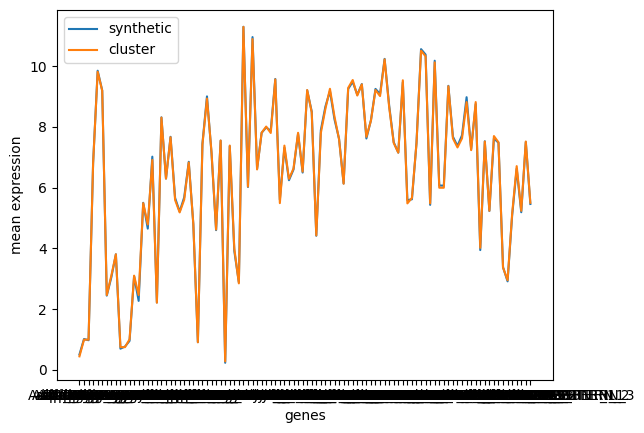

In [89]:
# sanity check for the synthetic data
plt.plot(sample_df.columns[:100], sample_df.mean()[:100], label='synthetic')
plt.plot(cluster_mean.columns[:100], cluster_mean.iloc[0, :100], label='cluster')
plt.legend()
plt.xlabel('genes')
plt.ylabel('mean expression')
plt.show()

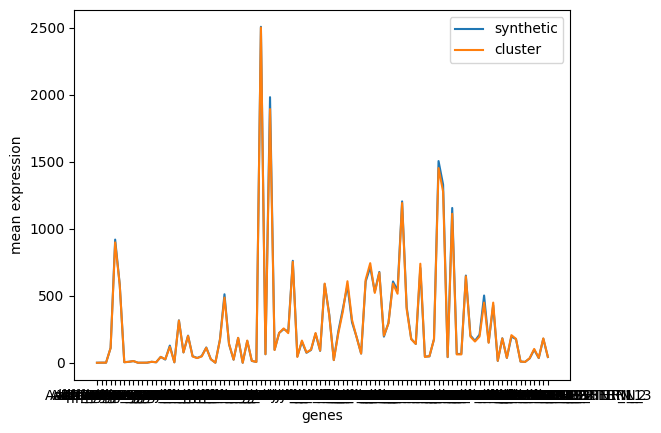

In [90]:
# sanity check for the synthetic data
plt.plot(sample_df.columns[:100], 2 ** sample_df.mean()[:100], label='synthetic')
plt.plot(cluster_mean.columns[:100], 2 ** cluster_mean.iloc[0, :100], label='cluster')
plt.legend()
plt.xlabel('genes')
plt.ylabel('mean expression')
plt.show()

In [91]:
# check gene percentage
cluster_mean_sum = (2 ** cluster_mean).sum(axis=1)
cluster_mean_percent = (2 ** cluster_mean).div(cluster_mean_sum, axis=0)

sample_df_sum = (2**sample_df).sum(axis=1)
sample_df_percent = (2 ** sample_df).div(sample_df_sum, axis=0)

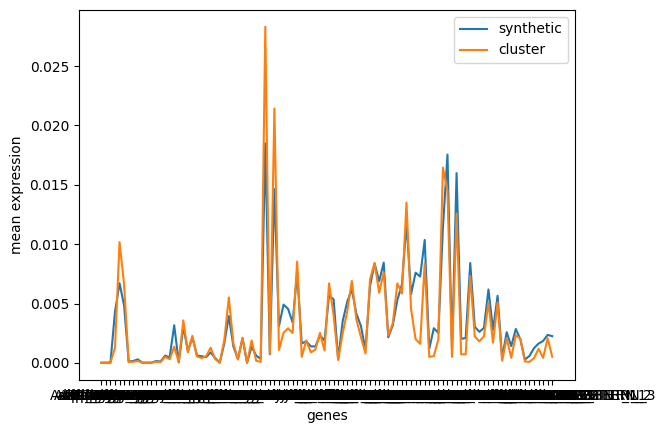

In [92]:
# sanity check for the synthetic data
plt.plot(sample_df_percent.columns[:100], sample_df_percent.mean()[:100], label='synthetic')
plt.plot(cluster_mean_percent.columns[:100], cluster_mean_percent.iloc[0, :100], label='cluster')
plt.legend()
plt.xlabel('genes')
plt.ylabel('mean expression')
plt.show()

In [95]:
# sanity check after scaling
# check gene percentage
cluster_mean_sum = cluster_mean.sum(axis=1)
cluster_mean_percent = (cluster_mean).div(cluster_mean_sum, axis=0)

sample_df_sum = sample_df.sum(axis=1)
sample_df_percent = (sample_df).div(sample_df_sum, axis=0)

In [1]:
# sanity check for the synthetic data
plt.plot(sample_df_percent.columns[:100], sample_df_percent.mean()[:100], label='synthetic')
plt.plot(cluster_mean_percent.columns[:100], cluster_mean_percent.iloc[0, :100], label='cluster')
plt.legend()
plt.xlabel('genes')
plt.ylabel('mean expression')
plt.show()

NameError: name 'plt' is not defined

In [97]:
sample_df

,aDC_HPCA_1,aDC_HPCA_2,aDC_HPCA_3,aDC_IRIS_1,aDC_IRIS_2,aDC_IRIS_3,Adipocytes_ENCODE_1,Adipocytes_ENCODE_2,Adipocytes_ENCODE_3,Adipocytes_FANTOM_1,...,Th2 cells_IRIS_3,Tregs_BLUEPRINT_1,Tregs_BLUEPRINT_2,Tregs_BLUEPRINT_3,Tregs_FANTOM_1,Tregs_FANTOM_2,Tregs_FANTOM_3,Tregs_HPCA_1,Tregs_HPCA_2,Tregs_HPCA_3
0,1.440443,2.258243,0.977408,12.013571,11.132270,9.861672,2.033257,2.738241,7.353876,-1.278640,...,6.391987,0.796043,0.447790,7.602770,1.067287,6.183658,7.308728,3.710061,4.002675,10.544574
1,2.508574,1.945327,1.140168,0.413709,8.690407,10.032482,5.517012,1.283018,6.041620,0.642149,...,0.994146,4.794238,6.827364,5.027155,7.159593,4.423689,5.574811,6.559182,4.564751,-0.914846
2,0.835879,0.680552,-0.726669,3.731719,9.824939,7.371037,6.901474,3.901232,4.305270,0.764152,...,7.918592,4.722698,1.424852,5.988263,0.487574,6.132041,7.002416,6.019373,6.069485,5.319322
3,1.963792,0.978656,0.765711,1.985617,8.640330,9.192749,7.838806,6.178460,-1.796537,1.838514,...,2.300575,3.750047,8.531852,6.561537,5.859163,5.991747,8.923382,3.625283,7.563863,12.441693
4,0.822218,1.279771,-0.954315,5.103324,9.971041,8.087393,0.477066,0.860985,3.053729,-0.730904,...,-0.382135,5.044932,3.917444,4.243872,6.839608,5.401863,7.865209,-0.341580,7.189487,10.646577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,-0.142289,0.831574,1.235034,5.251074,9.966271,10.558172,2.207884,2.652360,1.448860,-1.319832,...,3.775511,5.471097,3.916335,2.076833,6.323304,2.911404,1.022732,6.531013,5.193836,11.582240
1390,0.429238,1.915693,0.311631,7.653367,10.753474,7.360035,3.197549,-0.825154,4.136906,2.737547,...,2.948305,5.582784,3.188186,5.978650,3.491968,3.879688,8.434724,8.427533,4.958755,8.887742
1391,-1.672289,1.381221,0.145486,6.780115,8.156569,8.827455,3.831420,3.900923,5.333695,-0.715205,...,3.890409,9.583792,5.760608,2.889311,0.892287,9.961824,5.717161,8.265406,1.026694,7.469637
1392,-1.102291,2.506495,-0.221064,8.644560,10.183558,10.975604,3.680734,6.279706,1.736138,-0.618119,...,3.063480,4.995519,3.488413,6.529854,4.216371,6.091957,6.898645,6.631502,2.688768,9.514742


In [98]:
# save the synthetic data
if representation == '':
	sample_df.to_csv(save_dir + 'cluster_0_synthetic_data.csv')
elif representation == 'switches':
	sample_df.to_csv(save_dir + 'cluster_0_synthetic_data_switch.csv')

In [71]:
# save description of the synthetic data
description = pd.DataFrame(columns=['percentage'], index=cluster_mean.index)
description.iloc[0] = 1.0
for i in range(cluster_mean.shape[0]-1):
	description.loc[cluster_mean.index[i+1]] = 0.0

description

,percentage
SEACell,
SEACell-0,1.0
SEACell-1,0.0
SEACell-10,0.0
SEACell-11,0.0
SEACell-12,0.0
SEACell-13,0.0
SEACell-14,0.0
SEACell-2,0.0
SEACell-3,0.0


In [144]:
# save the description of the synthetic data
description.to_csv(save_dir + 'cluster_0_synthetic_description.csv')

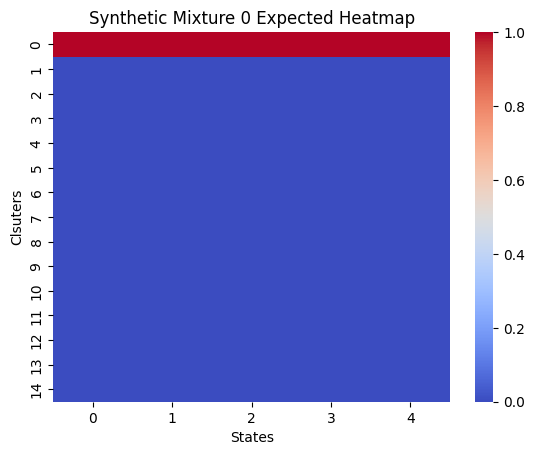

In [72]:
# plot synthetic data expected heatmap
vals = description.values.reshape(-1)
for i in range(4):
	description.insert(0, 'percentage_'+str(i), vals)

ax = sns.heatmap(description.astype(float), cmap='coolwarm', yticklabels=np.arange(15), xticklabels=[0, 1, 2, 3, 4])

plt.xlabel('States')
plt.ylabel('Clsuters')
plt.title('Synthetic Mixture 0 Expected Heatmap')
plt.savefig(save_dir + 'synthetic_mixture_0_expected_heatmap.jpeg')

### Generate samples with 50% cluster 0, 20% cluster 4, 30% cluster 10

In [32]:
cluster_mean

,SAMD11,ISG15,AGRN,RNF223,TNFRSF18,TNFRSF4,DVL1,MXRA8,KLHL21,TNFRSF9,...,CETN2,ZNF185,BCAP31,ATP6AP1,FAM50A,MPP1,CLIC2,TTTY14,MT-ND3,AC004556.3
SEACell,,,,,,,,,,,,,,,,,,,,,
SEACell-0,-2.037364,0.117748,-2.065191,-2.107447,-0.237960,1.699127,-1.705929,-2.043808,-1.759626,-1.440864,...,-1.847434,-2.107447,-1.168626,-1.500130,-0.493082,-1.962369,-2.107447,-2.062868,7.675290,-0.986462
SEACell-1,-1.133270,-0.444821,-0.887563,-1.127397,-0.621955,-0.640193,-0.667596,-0.818674,-0.787297,-0.924374,...,-0.967871,-1.126242,-0.458962,-0.782619,-0.369765,-1.154661,-1.121129,-1.005660,8.897392,-0.948313
SEACell-10,-0.183740,-0.183740,-0.047028,-0.183740,0.004919,-0.000475,-0.021361,-0.183740,-0.183740,-0.183740,...,-0.183740,-0.183740,-0.060421,-0.183740,-0.183740,-0.183740,-0.183740,-0.135665,11.619225,-0.183740
SEACell-11,-2.056597,-1.125438,-2.056597,-2.056597,1.932982,0.918293,-2.056597,-2.056597,-1.700134,-1.678472,...,-1.590270,-2.056597,-0.689365,-0.824946,-1.327848,-2.056597,-2.056597,-2.056597,7.188996,-1.256754
SEACell-12,-4.647574,2.953240,3.113095,0.194714,-4.006556,-4.700365,3.281246,-2.319919,-0.566295,-4.372877,...,0.930701,0.344899,2.614164,2.036814,4.770581,-4.542935,-4.922902,0.197082,8.111460,2.180300
SEACell-13,-0.932551,-0.014674,-0.932551,-0.932551,-0.569471,-0.756201,-0.620049,-0.932551,-0.932551,-0.932551,...,-0.932551,-0.932551,-0.695220,-0.588786,-0.300052,-0.781998,-0.932551,-0.932551,4.474178,-0.932551
SEACell-14,-4.779240,-2.295569,-4.187287,-4.779240,-2.836107,-3.905426,-2.739114,-4.779240,-3.058809,-2.609512,...,-3.315377,-4.417438,-1.261915,0.664244,0.586459,-0.613178,-0.845649,-4.650196,6.800735,-1.417724
SEACell-2,-2.769816,-0.219665,-2.769816,-2.719243,0.246097,-0.273991,-2.166319,-2.727303,-2.197459,-1.712936,...,-1.806411,-2.714154,-0.736293,-1.433990,-0.070098,-2.705206,-2.769816,-2.759889,7.541966,-1.977329
SEACell-3,-0.662403,-0.456109,-0.662403,-0.662403,-0.370838,-0.379174,-0.662403,-0.662403,-0.662403,-0.429059,...,-0.662403,-0.454092,-0.471819,-0.662403,-0.662403,-0.662403,-0.454064,-0.662403,4.981246,-0.662403


In [37]:
samples = 1394
sample_df = pd.DataFrame(index=range(samples), columns=cluster_mean.columns)
for col in cluster_mean.columns:
	cluster_0 = np.random.normal(cluster_mean[col][0], cluster_std[col][0], samples)
	cluster_4 = np.random.normal(cluster_mean[col][4], cluster_std[col][4], samples)
	cluster_10 = np.random.normal(cluster_mean[col][10], cluster_std[col][10], samples)

	sample_df[col] = np.log2(0.5 * 2 ** cluster_0 + 0.2 * 2 ** cluster_4 + 0.3 * 2 ** cluster_10)

sample_df.head()

,SAMD11,ISG15,AGRN,RNF223,TNFRSF18,TNFRSF4,DVL1,MXRA8,KLHL21,TNFRSF9,...,CETN2,ZNF185,BCAP31,ATP6AP1,FAM50A,MPP1,CLIC2,TTTY14,MT-ND3,AC004556.3
0,-1.050419,0.438701,-0.563512,-1.434266,-1.148164,10.861729,3.306076,-1.976574,1.030724,-2.806752,...,3.176576,1.369353,3.639223,1.035939,1.288471,1.202202,-0.470585,0.040200,9.713461,5.243501
1,-1.668632,1.998697,2.060813,0.824137,-2.733868,-1.073187,3.515381,-2.521542,-1.359055,-1.429464,...,-0.686944,0.112772,1.837362,0.106645,1.267749,-1.880080,-2.345147,-0.245780,7.928401,6.467790
2,-1.550299,2.563909,1.013538,-0.235015,6.036394,3.502618,2.704189,-0.409353,0.535714,2.692968,...,-1.349983,-1.805598,1.339297,1.439182,1.894711,-1.450605,-1.041196,1.041703,8.374412,-0.007163
3,-1.135212,4.354924,-2.270298,0.369728,-3.242716,3.918360,2.606920,1.479221,3.113825,-0.433223,...,-2.091528,-0.822960,2.837867,5.814207,6.483347,-0.858238,-1.593023,0.042048,9.660973,3.671492
4,-1.135772,0.064317,2.506499,-1.461684,-2.213383,-0.769672,1.994854,3.033073,-0.767222,-0.169198,...,0.670823,-0.650044,2.367828,0.922331,3.611950,-2.231124,-2.812196,-1.251745,9.596466,0.307300


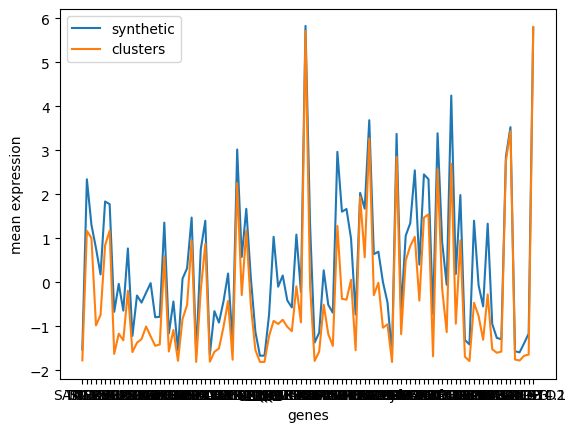

In [38]:
# sanity check for the synthetic data
plt.plot(sample_df.columns[:100], sample_df.mean()[:100], label='synthetic')
plt.plot(np.log2(0.5 * 2 ** cluster_mean.iloc[0, :100] + 0.2 * 2 ** cluster_mean.iloc[4, :100] + 0.3 * 2 ** cluster_mean.iloc[10, :100]), label='clusters')

plt.legend()
plt.xlabel('genes')
plt.ylabel('mean expression')
plt.show()

In [39]:
# save the synthetic data
if representation == '':
	sample_df.to_csv(save_dir + 'cluster_mixture_normalized_synthetic_data.csv')
elif representation == 'switches':
	sample_df.to_csv(save_dir + 'cluster_mixture_normalized_synthetic_data_switch.csv')

In [40]:
# save description of the synthetic data
description = pd.DataFrame(columns=['percentage'], index=cluster_mean.index)
for i in range(cluster_mean.shape[0]):
	description.loc[cluster_mean.index[i]] = 0.0
description.iloc[0] = 0.5
description.iloc[4] = 0.2
description.iloc[10] = 0.3

description

,percentage
SEACell,
SEACell-0,0.5
SEACell-1,0.0
SEACell-10,0.0
SEACell-11,0.0
SEACell-12,0.2
SEACell-13,0.0
SEACell-14,0.0
SEACell-2,0.0
SEACell-3,0.0


In [41]:
# save the description of the synthetic data
description.to_csv(save_dir + 'cluster_mixture_normalized_synthetic_description.csv')

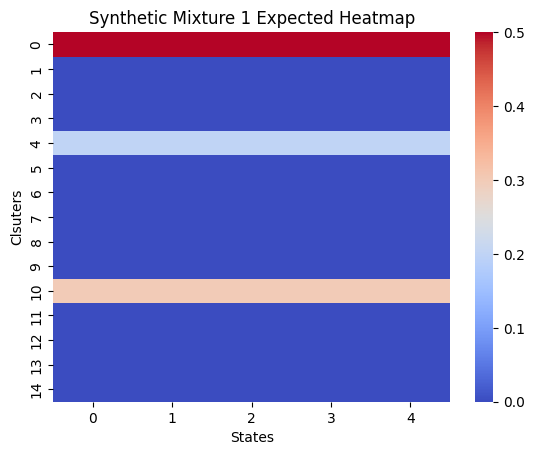

In [42]:
# plot synthetic data expected heatmap
vals = description.values.reshape(-1)
for i in range(4):
	description.insert(0, 'percentage_'+str(i), vals)

ax = sns.heatmap(description.astype(float), cmap='coolwarm', yticklabels=np.arange(15), xticklabels=[0, 1, 2, 3, 4])

plt.xlabel('States')
plt.ylabel('Clsuters')
plt.title('Synthetic Mixture 1 Expected Heatmap')
plt.savefig(save_dir + 'synthetic_mixture_1_expected_heatmap.jpeg', dpi=300, bbox_inches="tight")

### Generate samples with 0.4 cluster 1, 0.2 cluster 4, 0.1 cluster 6, 0.1 cluster 11

In [43]:
samples = 1394
sample_df = pd.DataFrame(index=range(samples), columns=cluster_mean.columns)
for col in cluster_mean.columns:
	cluster_1 = np.random.normal(cluster_mean[col][1], cluster_std[col][1], samples)
	cluster_4 = np.random.normal(cluster_mean[col][4], cluster_std[col][4], samples)
	cluster_6 = np.random.normal(cluster_mean[col][6], cluster_std[col][6], samples)
	cluster_11 = np.random.normal(cluster_mean[col][11], cluster_std[col][11], samples)

	sample_df[col] = np.log2(0.5 * 2 ** cluster_1 + 0.3 * 2 ** cluster_4 + 0.1 * 2 ** cluster_6 + 0.1 * 2 ** cluster_11)

sample_df.head()

,SAMD11,ISG15,AGRN,RNF223,TNFRSF18,TNFRSF4,DVL1,MXRA8,KLHL21,TNFRSF9,...,CETN2,ZNF185,BCAP31,ATP6AP1,FAM50A,MPP1,CLIC2,TTTY14,MT-ND3,AC004556.3
0,-0.699087,5.811059,-0.427342,-2.215502,0.899648,0.174844,2.438312,-2.198013,-1.697706,-0.037354,...,10.570236,0.190276,2.229131,3.065866,3.444731,-0.481010,-0.634828,0.914878,6.590437,6.401746
1,-1.083641,3.149116,2.539416,-0.753348,3.756689,-0.224642,1.362188,-0.513504,7.916032,-2.100354,...,0.361166,-0.408720,4.378594,3.089512,5.472751,1.143408,-3.135849,-1.372274,8.779254,3.418642
2,-3.450927,-0.213610,5.917264,8.059817,4.452576,-0.701609,1.088855,0.816875,2.522826,2.090076,...,0.311541,-1.200550,1.298772,2.592223,4.219757,-3.631521,1.564881,0.348507,6.973208,2.468225
3,-0.051339,2.492129,0.091674,2.966975,5.081244,0.281614,2.064410,0.200839,-0.600905,0.921248,...,-1.633550,-0.871325,0.183080,6.514572,1.853893,-2.460486,-1.376127,-0.414163,11.587155,1.347863
4,-3.504339,1.483971,-0.939372,-2.283034,1.499698,3.784909,6.062234,-1.358374,-2.512202,1.053606,...,2.807825,-2.222666,2.054234,-1.193650,5.871607,-0.361694,-1.341364,-0.897174,7.346665,6.641272


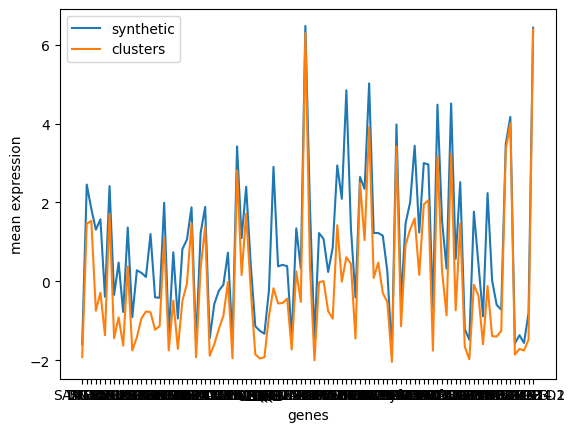

In [44]:
# sanity check for the synthetic data
plt.plot(sample_df.columns[:100], sample_df.mean()[:100], label='synthetic')
plt.plot(np.log2(0.5 * 2 ** cluster_mean.iloc[1, :100] + 0.3 * 2 ** cluster_mean.iloc[4, :100] + 0.1 * 2 ** cluster_mean.iloc[6, :100]+ 0.1 * 2 ** cluster_mean.iloc[11, :100]), label='clusters')

plt.legend()
plt.xlabel('genes')
plt.ylabel('mean expression')
plt.show()

In [45]:
# save the synthetic data
if representation == '':
	sample_df.to_csv(save_dir + 'cluster_mixture_normalized_synthetic_data_2.csv')
elif representation == 'switches':
	sample_df.to_csv(save_dir + 'cluster_mixture_normalized_synthetic_data_2_switch.csv')

In [46]:
# save description of the synthetic data
description = pd.DataFrame(columns=['percentage'], index=cluster_mean.index)
for i in range(cluster_mean.shape[0]):
	description.loc[cluster_mean.index[i]] = 0.0
description.iloc[1] = 0.5
description.iloc[4] = 0.3
description.iloc[6] = 0.1
description.iloc[11] = 0.1

description

,percentage
SEACell,
SEACell-0,0.0
SEACell-1,0.5
SEACell-10,0.0
SEACell-11,0.0
SEACell-12,0.3
SEACell-13,0.0
SEACell-14,0.1
SEACell-2,0.0
SEACell-3,0.0


In [30]:
# save the description of the synthetic data
description.to_csv(save_dir + 'cluster_mixture_normalized_synthetic_description_2.csv')

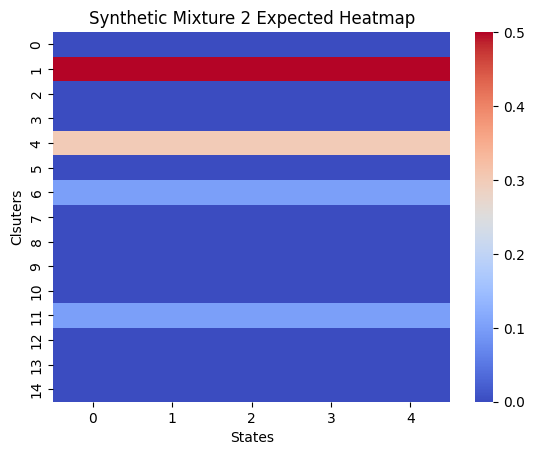

In [79]:
# plot synthetic data expected heatmap
vals = description.values.reshape(-1)
for i in range(4):
	description.insert(0, 'percentage_'+str(i), vals)

ax = sns.heatmap(description.astype(float), cmap='coolwarm', yticklabels=np.arange(15), xticklabels=[0, 1, 2, 3, 4])

plt.xlabel('States')
plt.ylabel('Clsuters')
plt.title('Synthetic Mixture 2 Expected Heatmap')
plt.savefig(save_dir + 'synthetic_mixture_2_expected_heatmap.jpeg', dpi=300, bbox_inches="tight")